In [145]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
sns.set()
warnings.filterwarnings("ignore")
%matplotlib inline

In [148]:
diabetes_df = pd.read_csv("diabetes.csv")

In [149]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [150]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [151]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [152]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [153]:
diabetes_df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [154]:
diabetes_df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [155]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [156]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


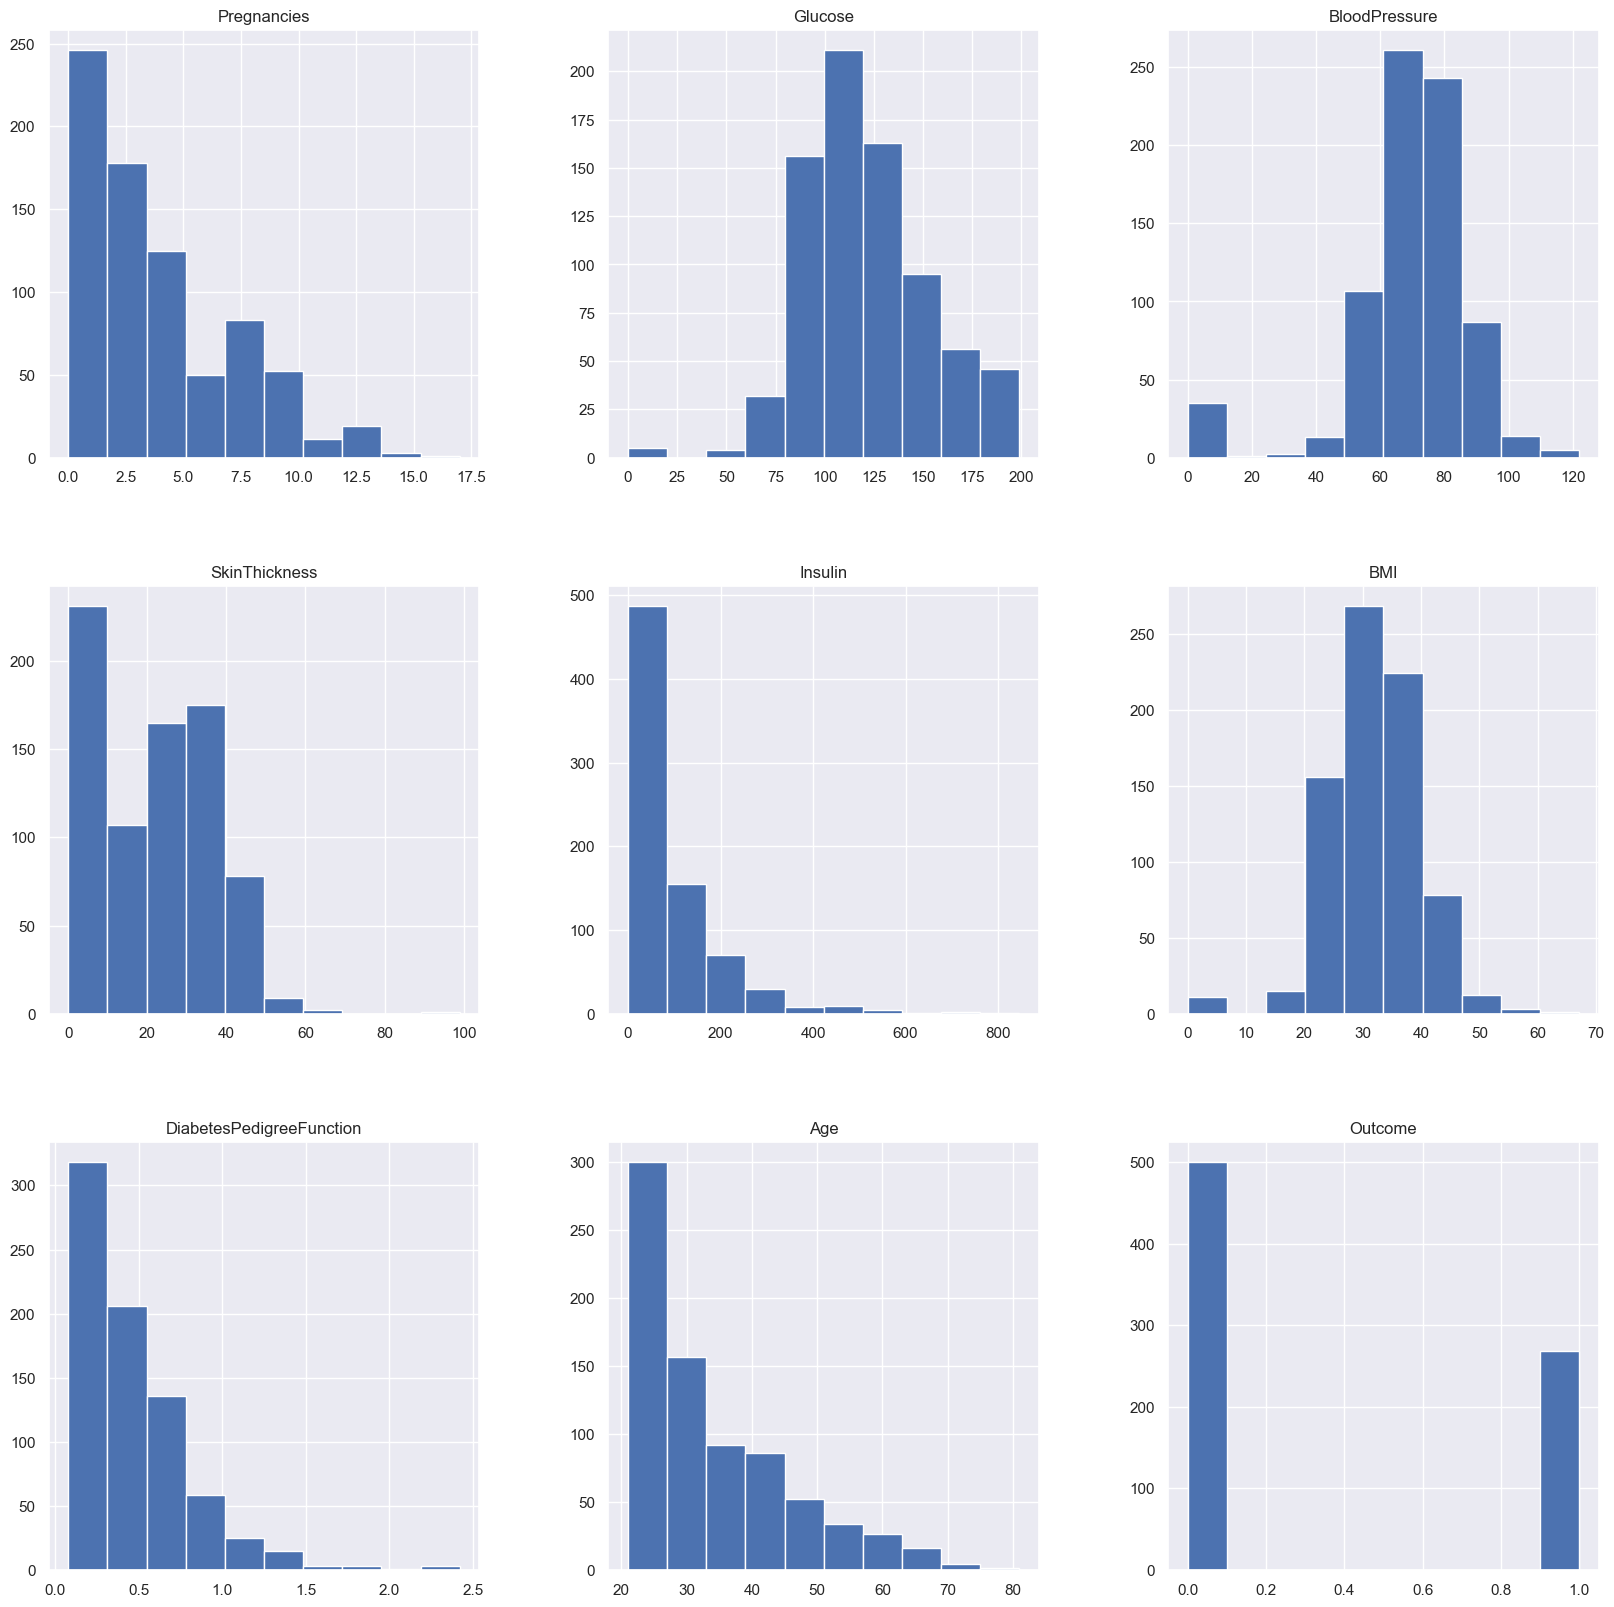

In [157]:
p = diabetes_df.hist(figsize=(20,20))

In [158]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

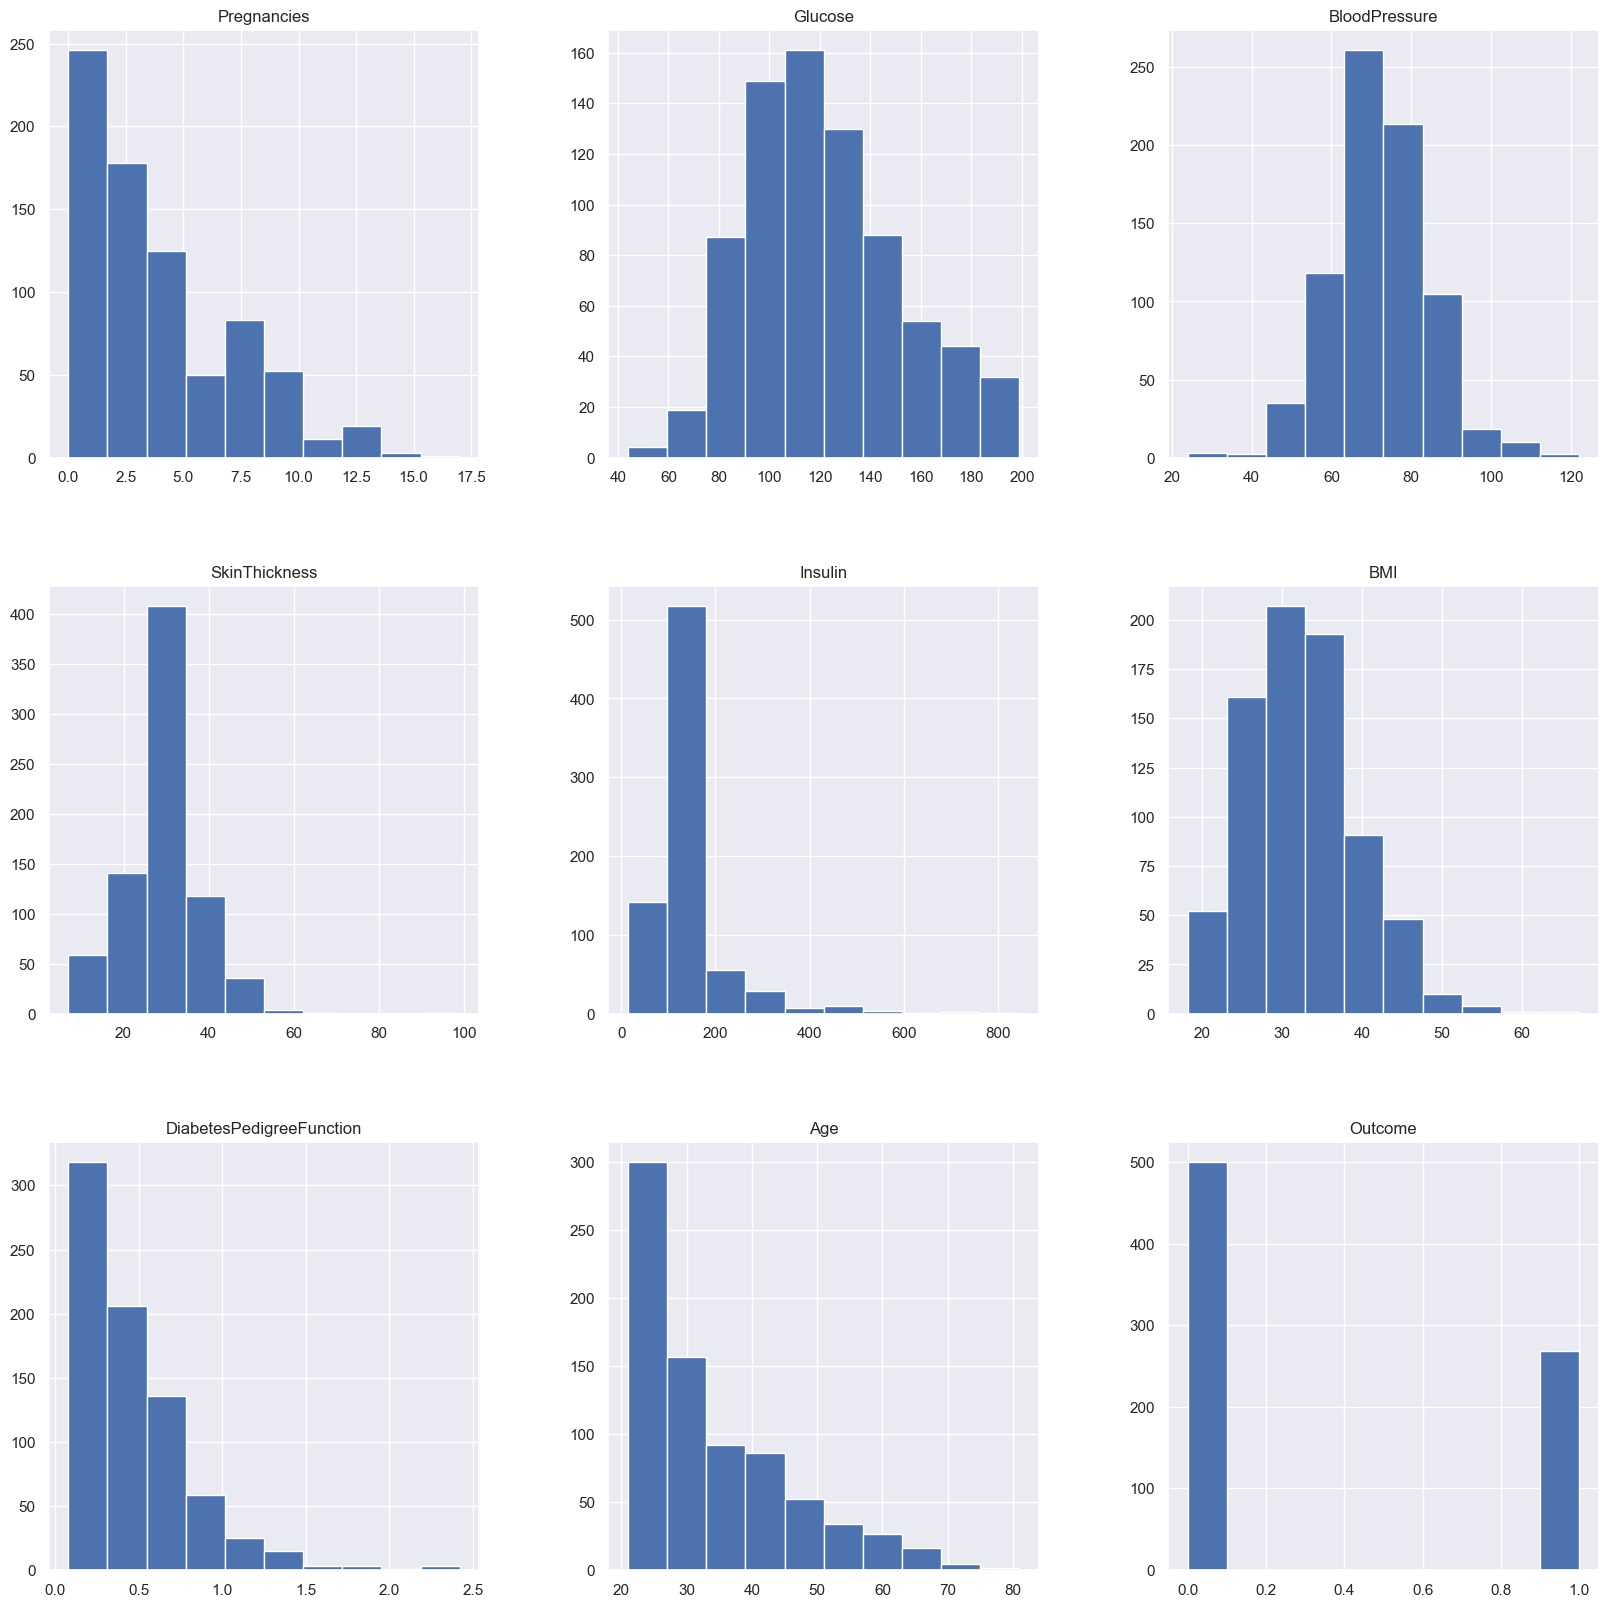

In [159]:
p = diabetes_df_copy.hist(figsize=(20,20))

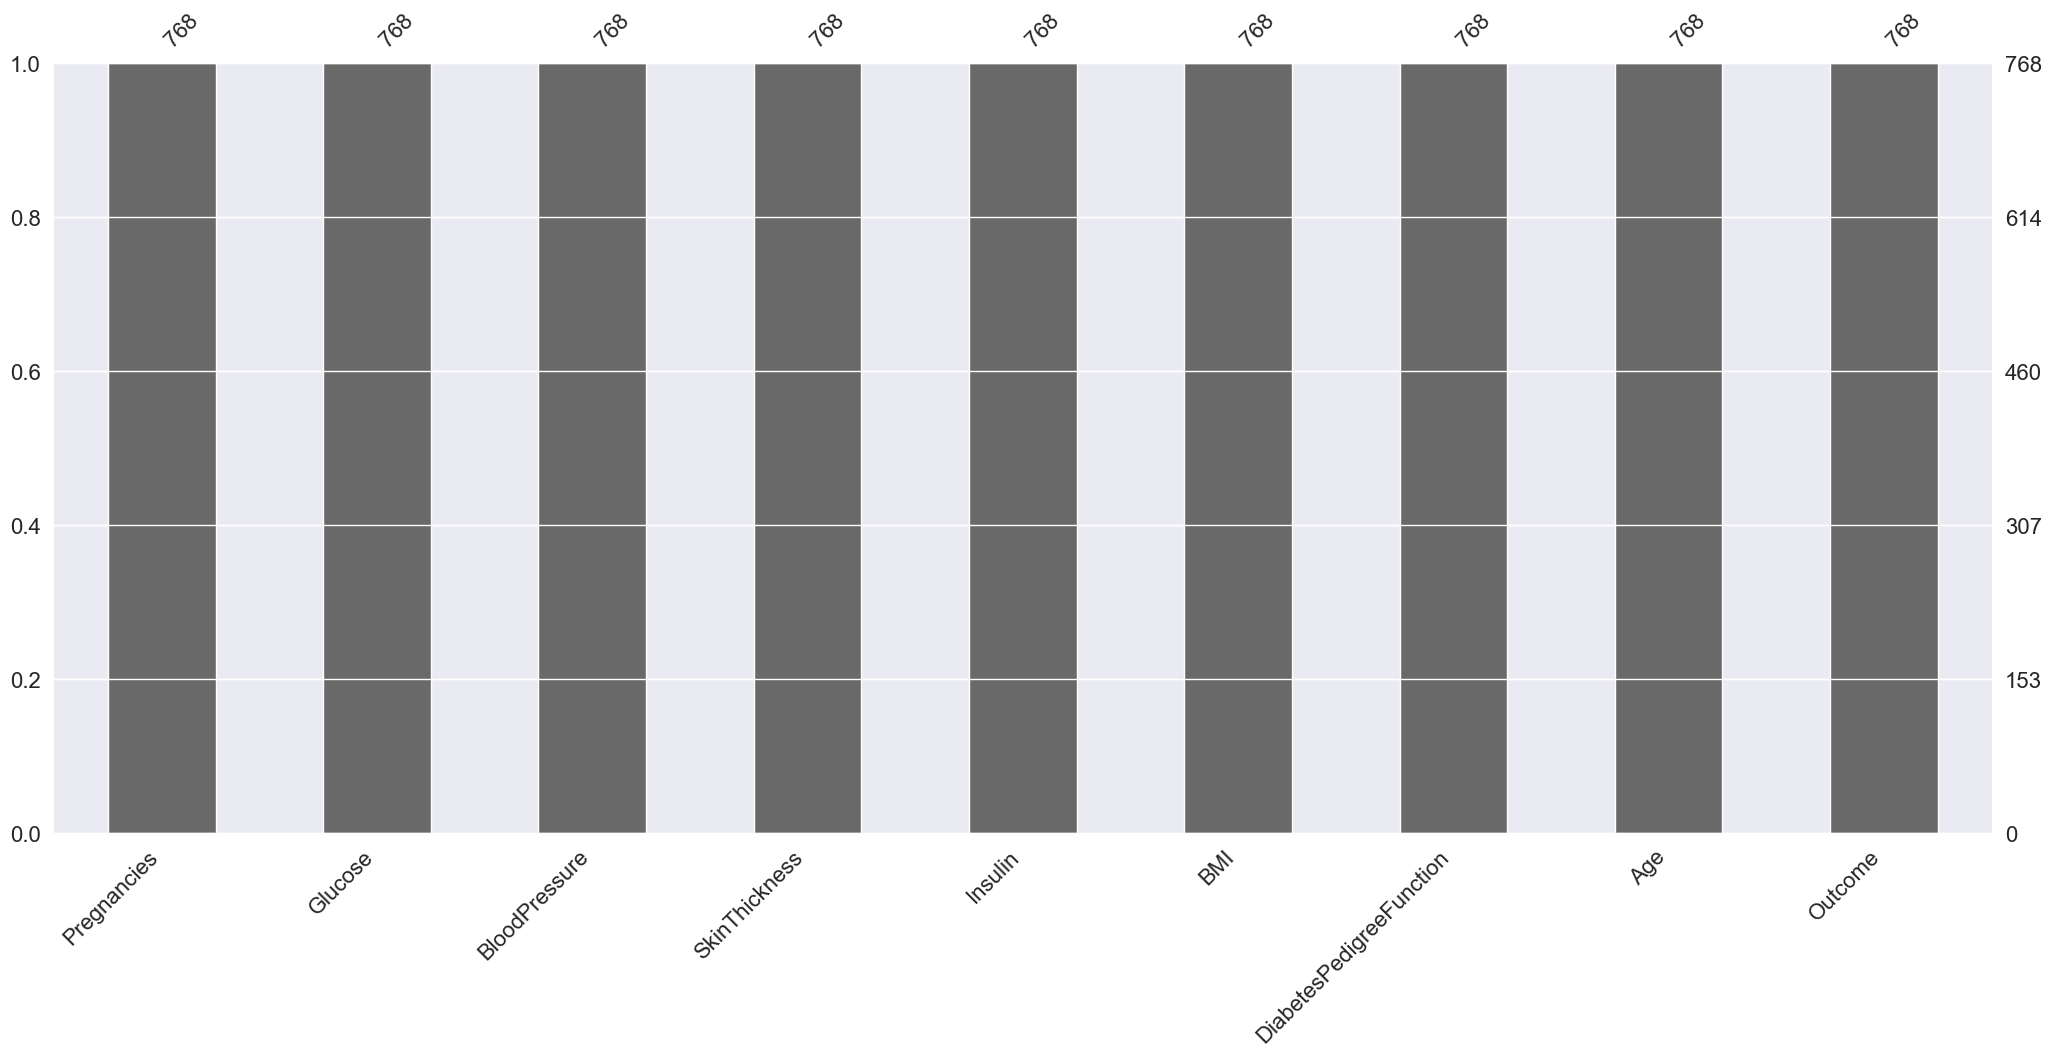

In [160]:
p = msno.bar(diabetes_df)

0    500
1    268
Name: Outcome, dtype: int64


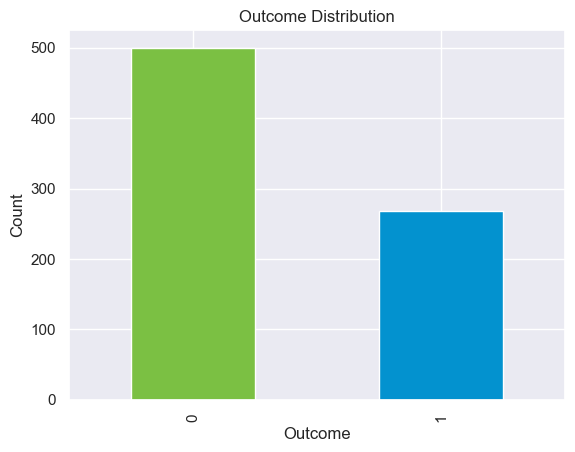

In [161]:
import matplotlib.pyplot as plt
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df["Outcome"].value_counts())
diabetes_df["Outcome"].value_counts().plot(kind="bar", color=colors)
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


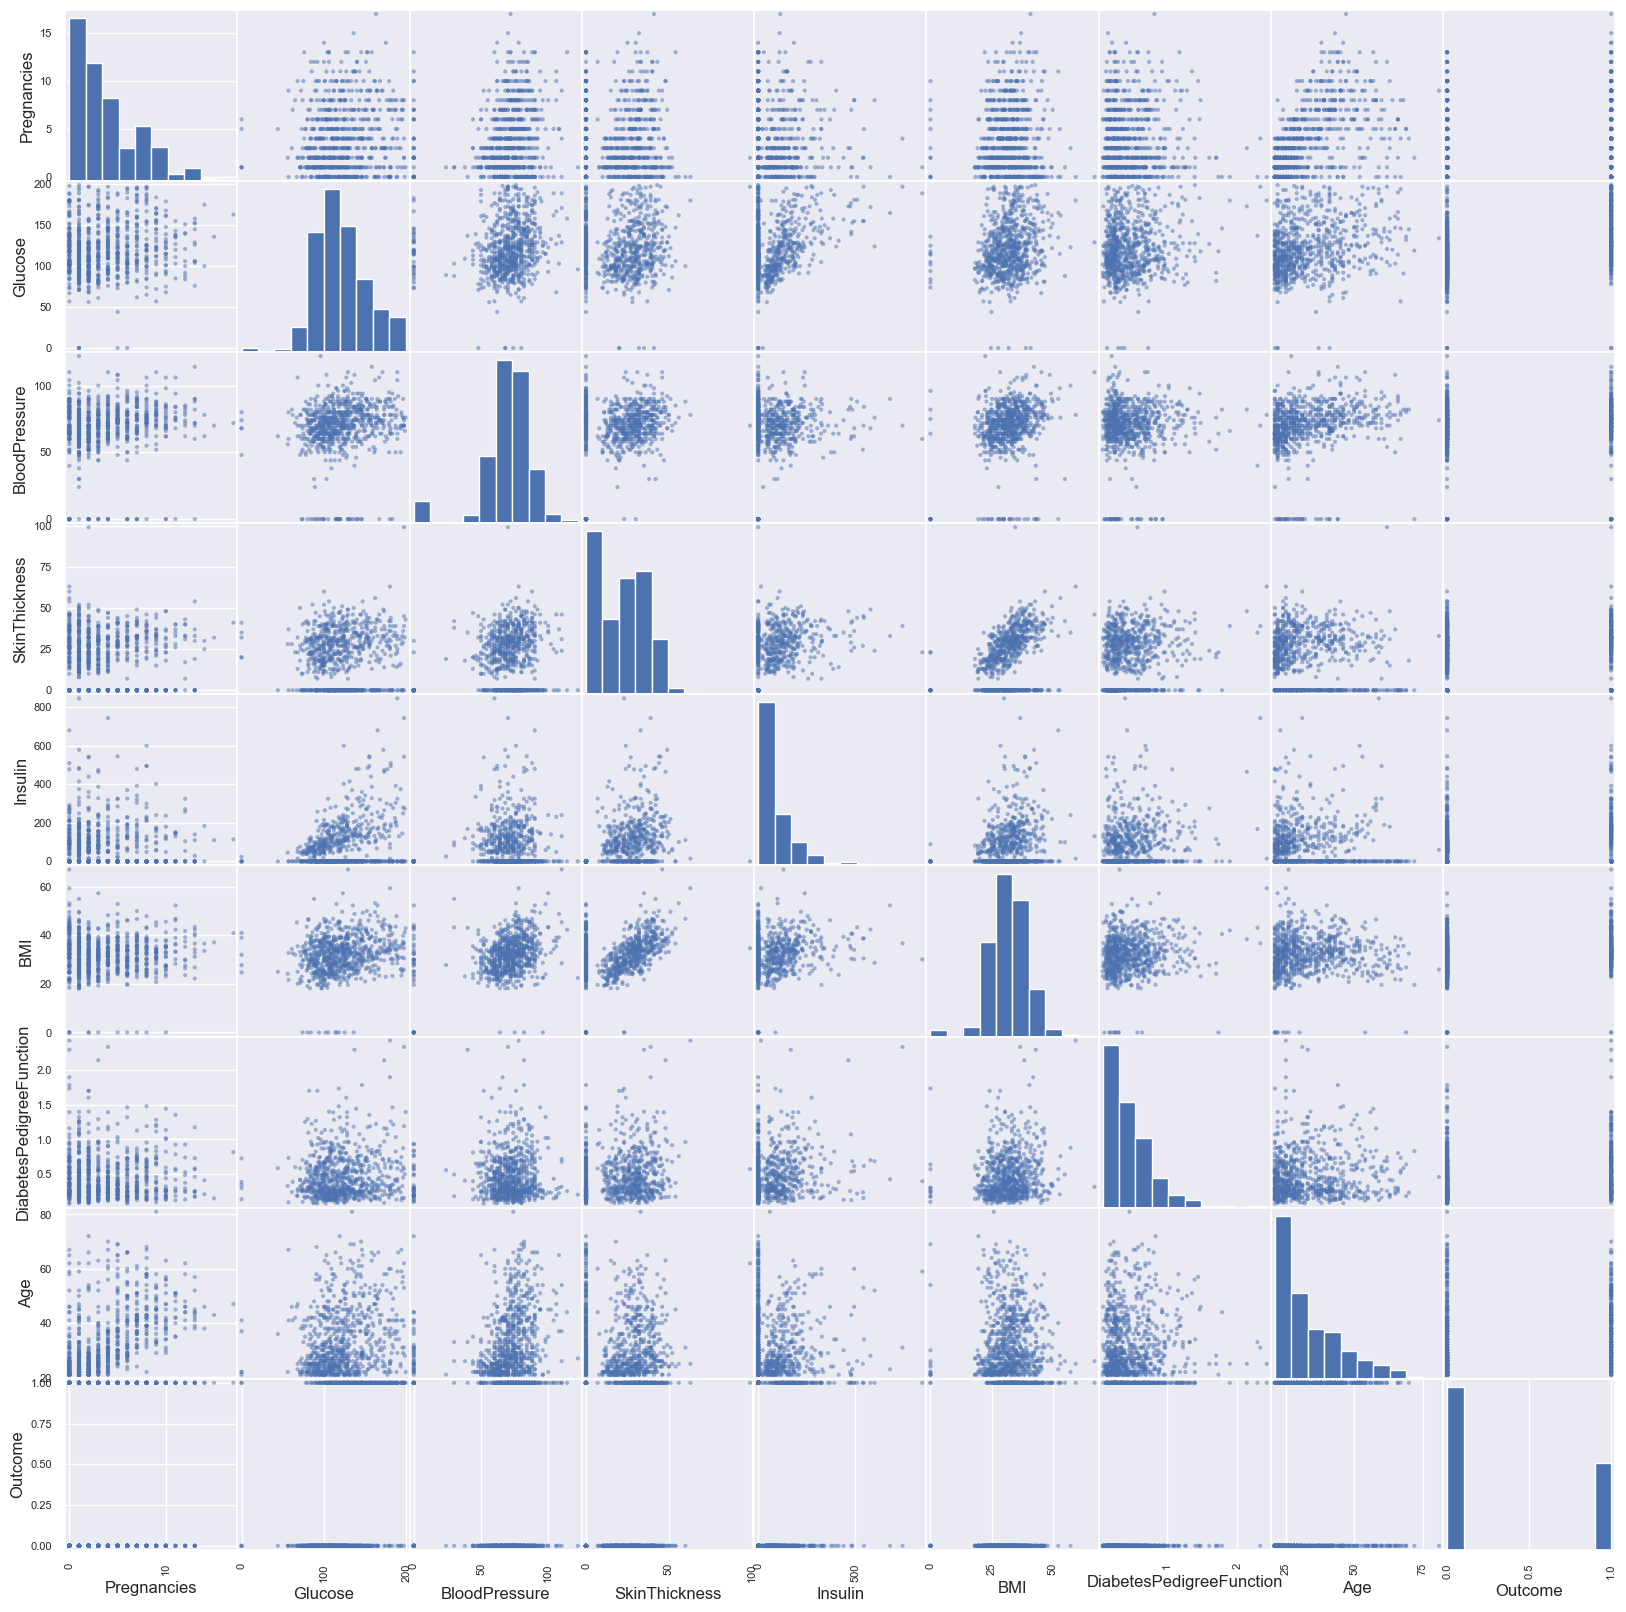

In [162]:
p =scatter_matrix(diabetes_df,figsize=(20,20))

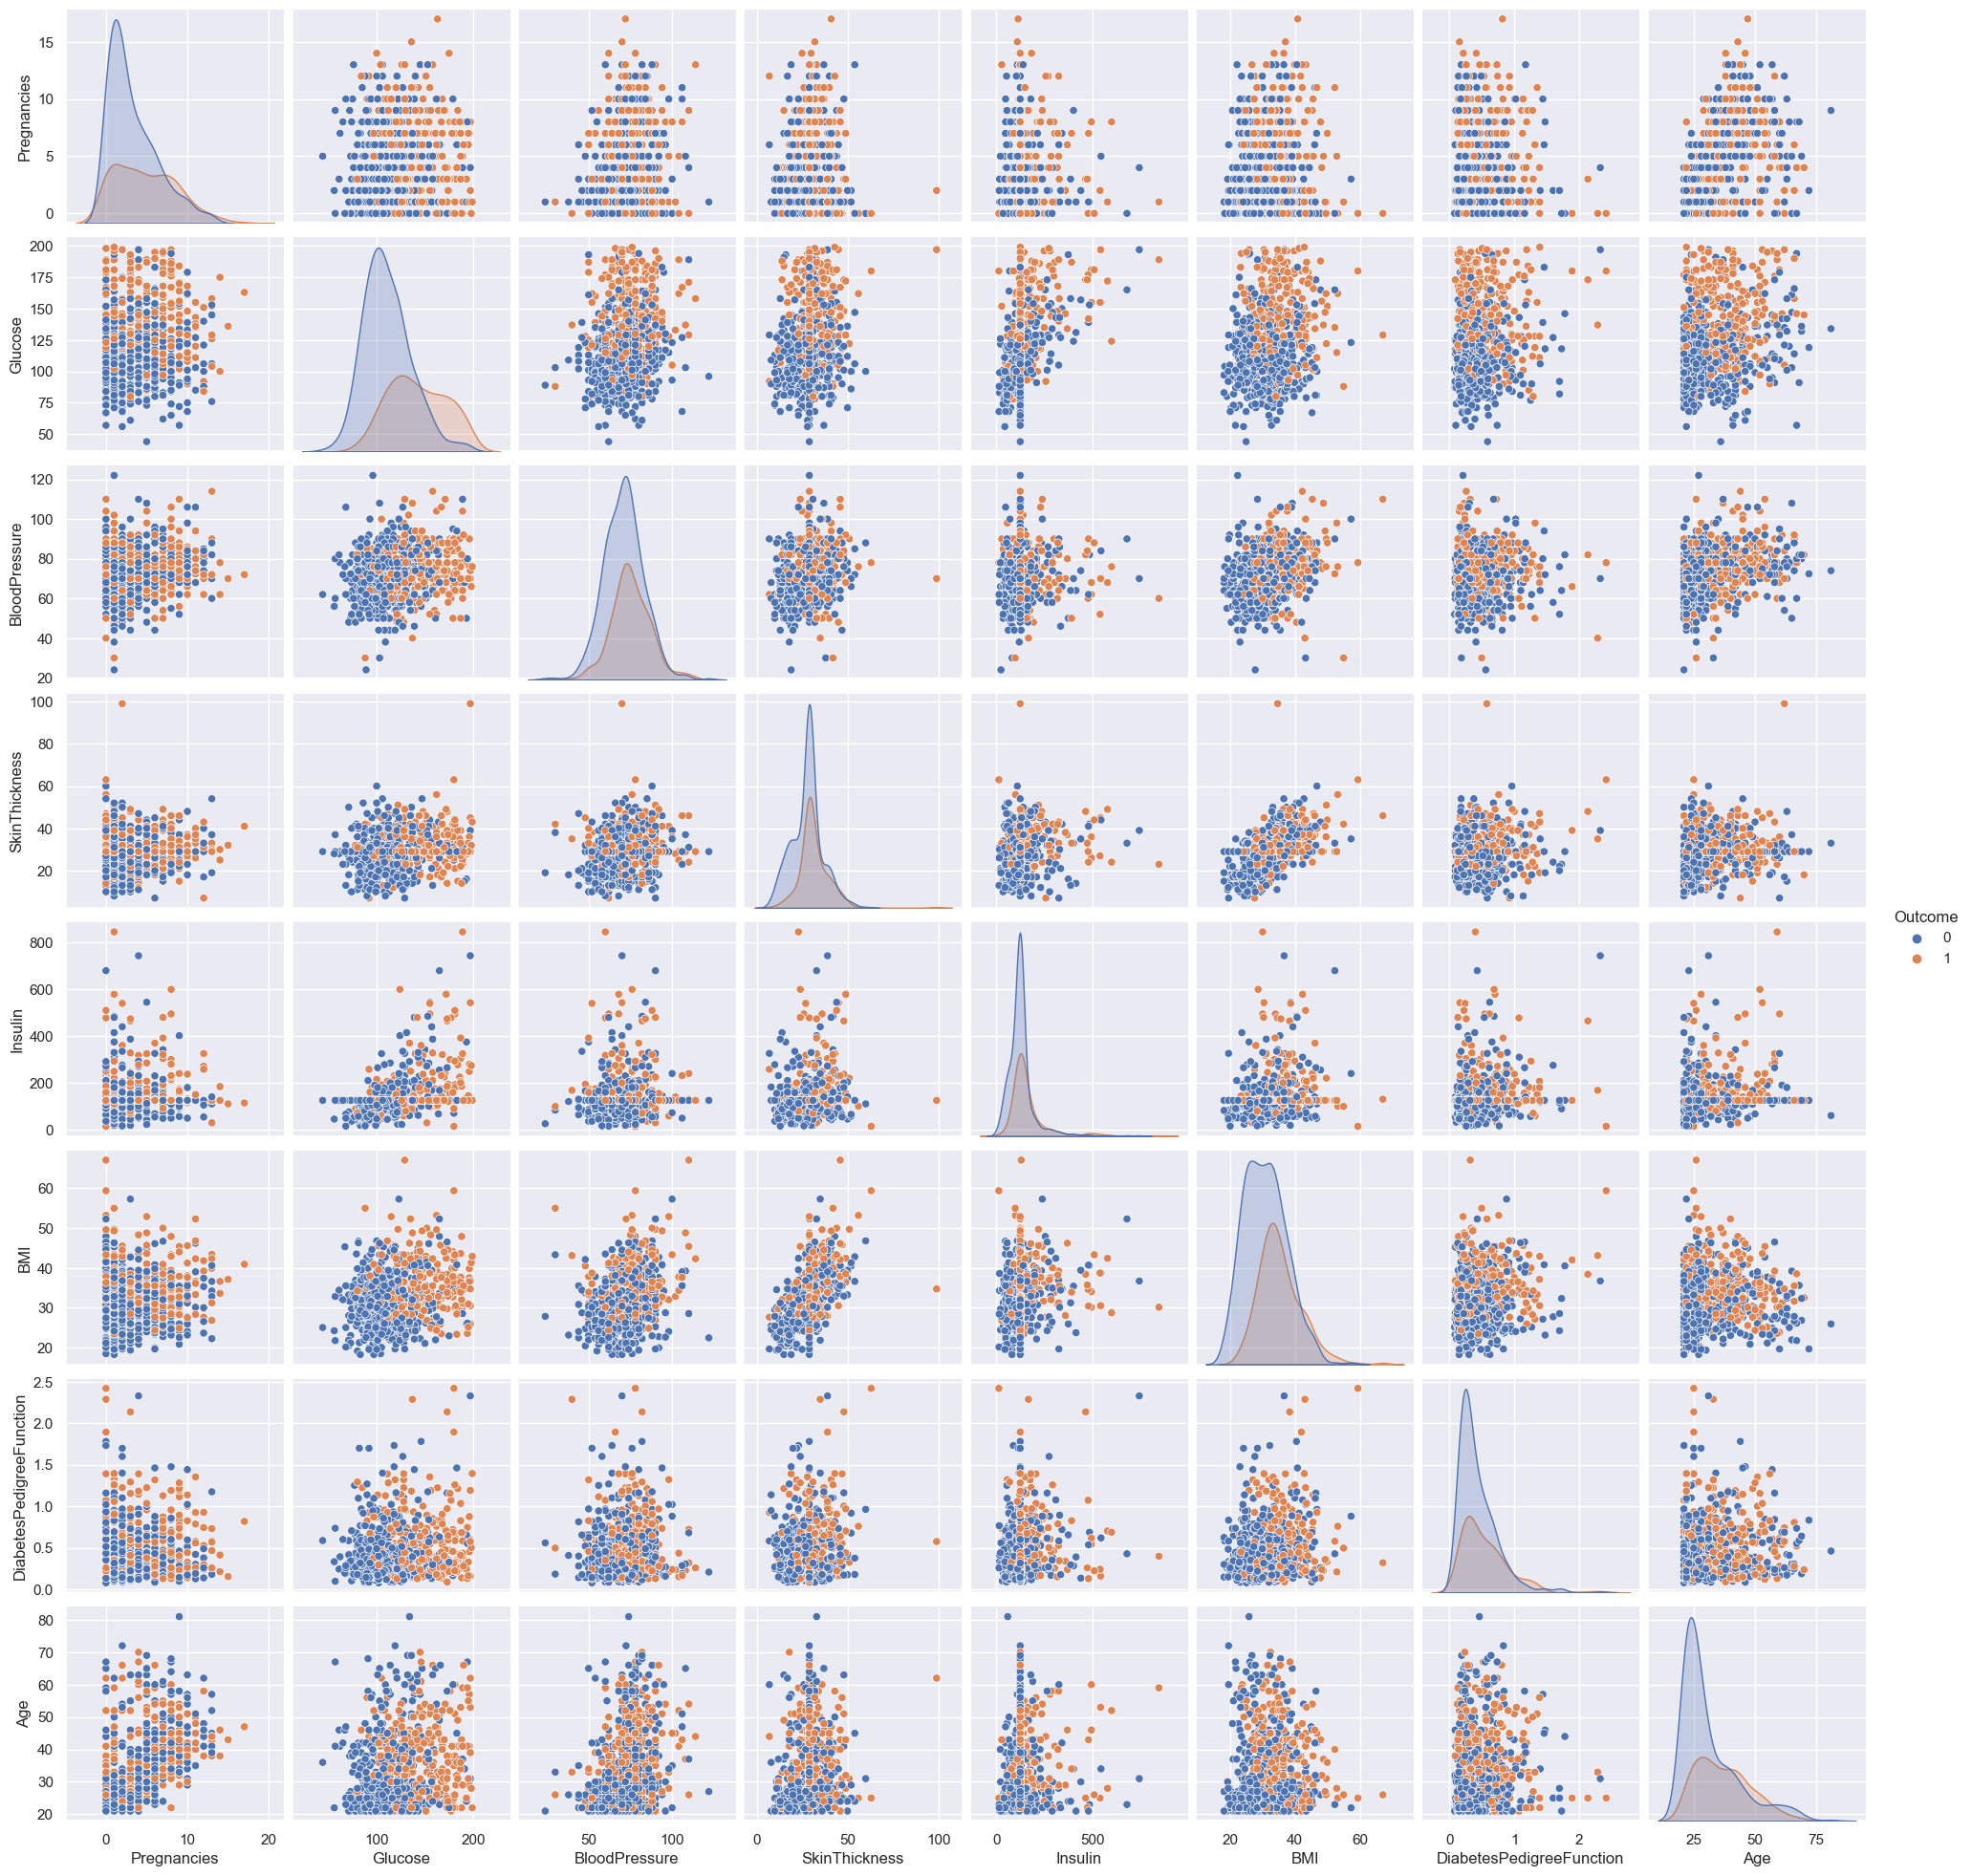

In [163]:
p=sns.pairplot(diabetes_df_copy,hue = 'Outcome')

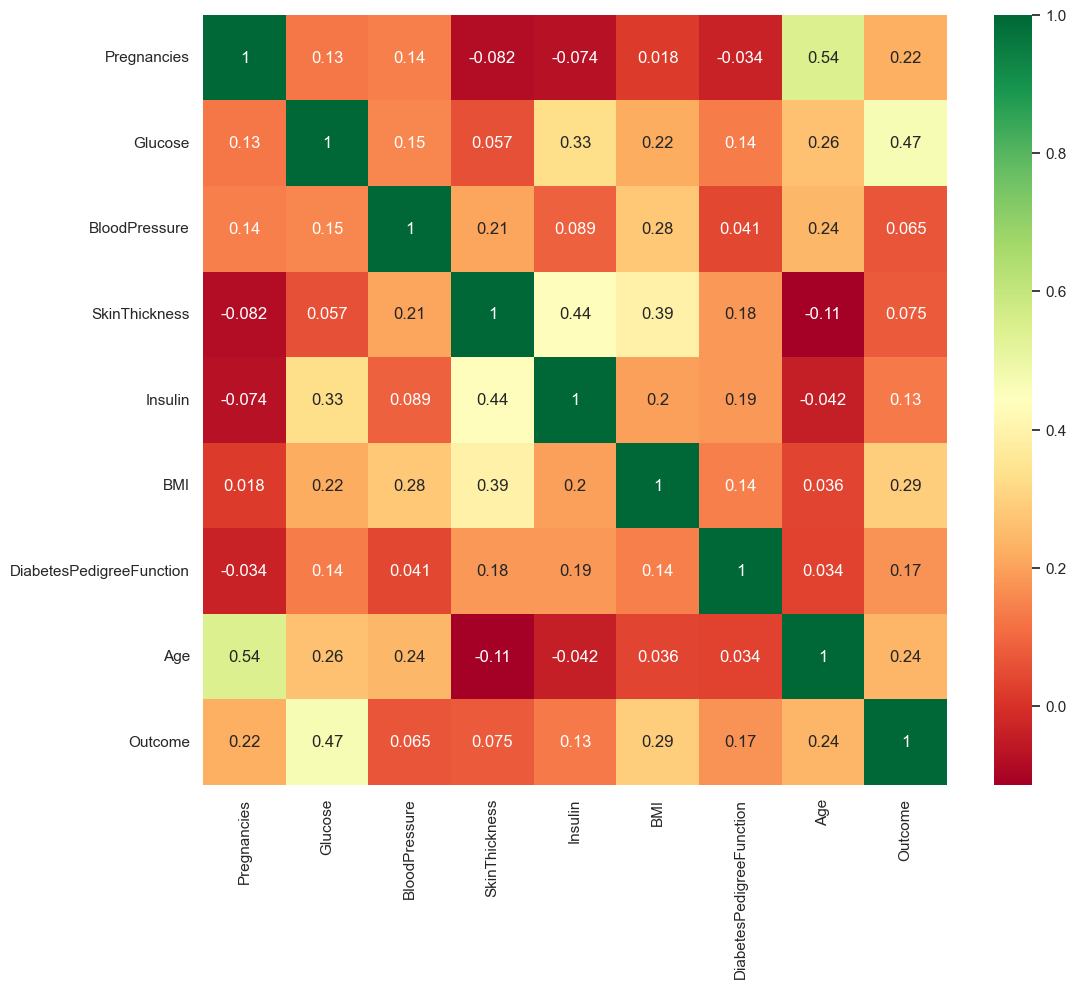

In [164]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df.corr(), annot=True, cmap='RdYlGn')

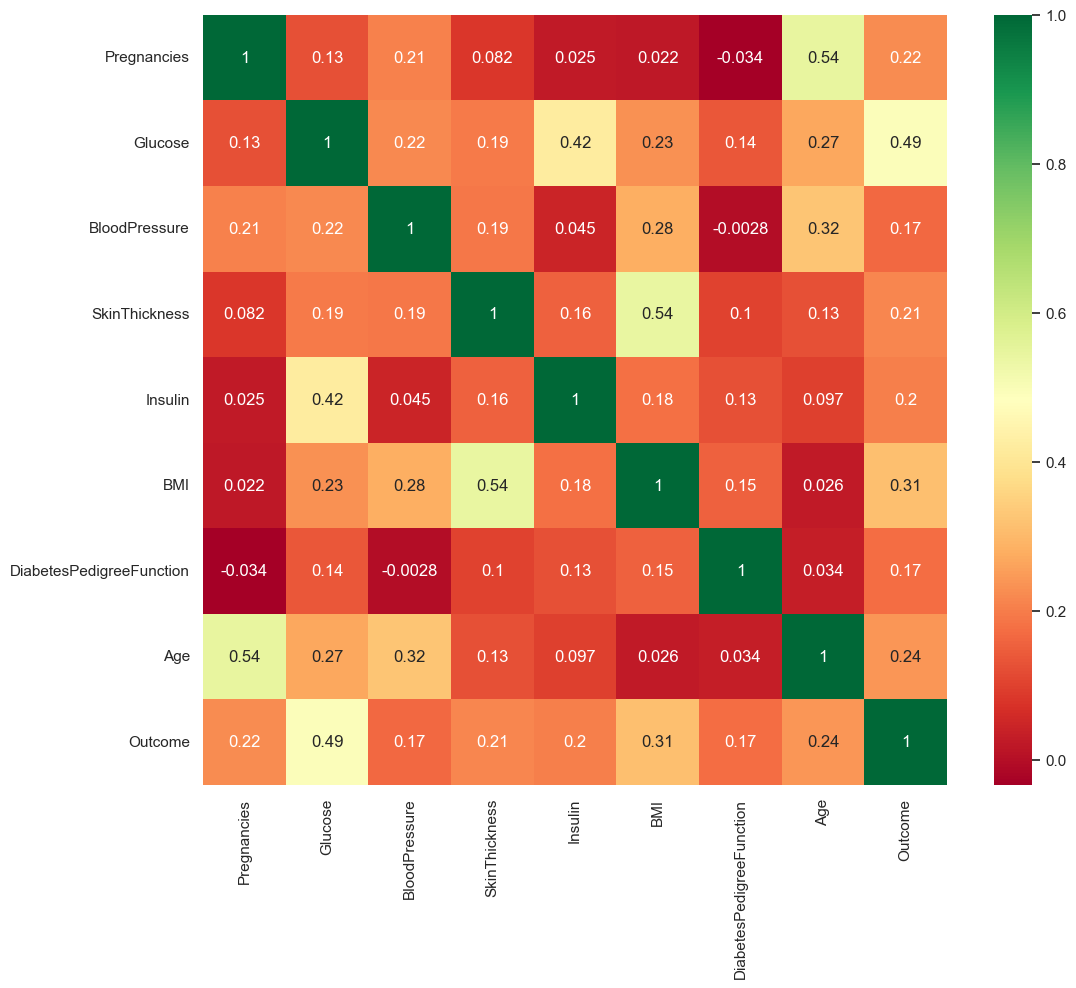

In [165]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(diabetes_df_copy.corr(), annot=True, cmap='RdYlGn')

In [166]:
diabetes_df_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [167]:
sc_X = StandardScaler()
X= pd.DataFrame(sc_X.fit_transform(diabetes_df_copy.drop(["Outcome"],axis= 1),),columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']) 
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [168]:
y =diabetes_df_copy.Outcome

In [169]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/3, random_state=42,stratify=y)

## KNN

In [171]:
test_scores = []
train_scores = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


In [172]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [173]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [174]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {}% and k = {}'.format(max_train_score * 100,list(map(lambda x: x+1,train_scores_ind))))


Max train score 100.0% and k = [1]


In [175]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% and k = {}'.format(max_test_score * 100,list(map(lambda x: x+1,test_scores_ind))))


Max test score 76.5625% and k = [11]


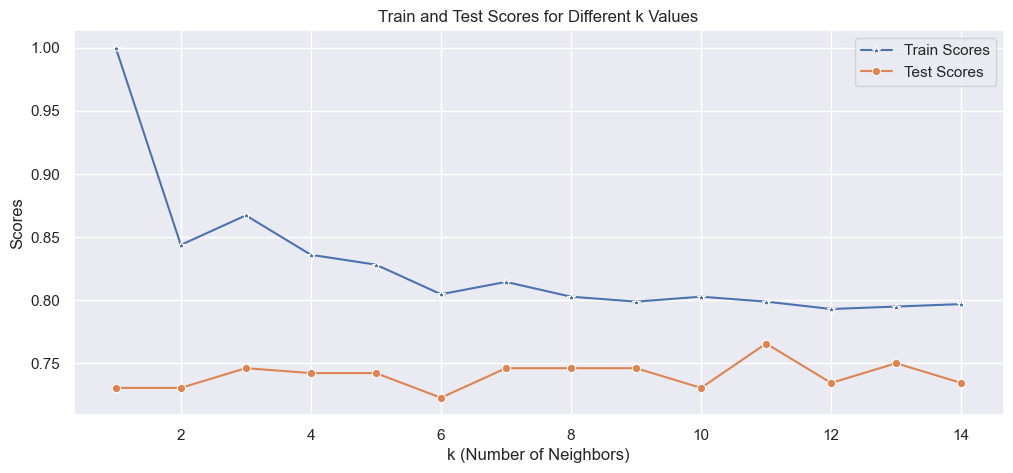

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
p = sns.lineplot(x=range(1, 15), y=train_scores, marker='*', label='Train Scores')
p = sns.lineplot(x=range(1, 15), y=test_scores, marker='o', label='Test Scores')

plt.title('Train and Test Scores for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Scores')
plt.legend()

# Display the plot
plt.show()


In [177]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
accuracy_knn = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy_knn:.2f}')


Accuracy: 0.77


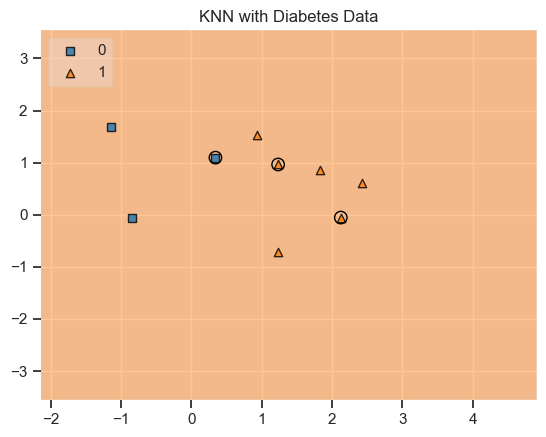

In [178]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: value, 7: value},
                      X_highlight=X_test.values)

plt.title('KNN with Diabetes Data')
plt.show()


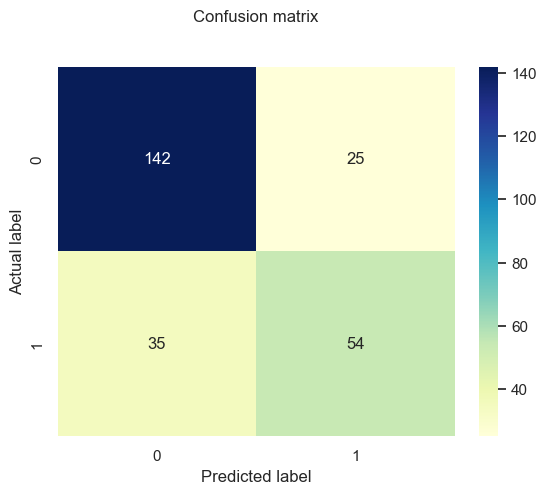

In [179]:
y_pred = knn.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



In [181]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


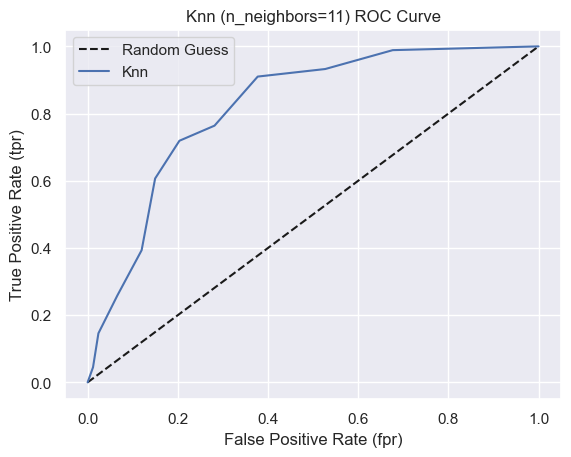

In [182]:
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Random Guess line
plt.plot(fpr, tpr, label='Knn')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Knn (n_neighbors=11) ROC Curve')

plt.legend()
plt.show()


In [183]:
roc_auc_score(y_test,y_pred_proba)

0.8193500639171096

## Naive Bayes

In [184]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [185]:
# this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)
# this returns array of predicted results
prediction_from_test_data = nb_model.predict(X_test)

In [186]:
from sklearn import metrics

accuracy_NB = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy_NB))

Accuracy of our naive bayes model is : 0.7637


In [187]:
print ("Confusion Matrix")
# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 54  35]
 [ 36 131]]


In [188]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.61      0.60        89
           0       0.79      0.78      0.79       167

    accuracy                           0.72       256
   macro avg       0.69      0.70      0.70       256
weighted avg       0.72      0.72      0.72       256



## LogisticRegression

In [189]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

# Assuming lr_predict_test contains the predictions
accuracy_Logistic = metrics.accuracy_score(y_test, lr_predict_test)

# Training metrics
print(f"Accuracy: {accuracy_Logistic:.4f}")

print ("Confusion Matrix")

print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))

Accuracy: 0.7305
Confusion Matrix
[[ 47  42]
 [ 27 140]]

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.53      0.58        89
           0       0.77      0.84      0.80       167

    accuracy                           0.73       256
   macro avg       0.70      0.68      0.69       256
weighted avg       0.72      0.73      0.72       256



## svm

In [190]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)


accuracy_SVM = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy_SVM))
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))
print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

# separating the data and labels
X = diabetes_df.drop(columns='Outcome', axis=1)
Y = diabetes_df['Outcome']
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
Y = diabetes_df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Create an SVC object
classifier = SVC(kernel='linear')

# Training the Support Vector Machine Classifier
classifier.fit(X_train, Y_train)

# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data: ', training_data_accuracy)

# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy of our SVM model is : 0.7871
Accuracy: 0.7344
Confusion Matrix for Support Vector Amchine
[[ 45  44]
 [ 24 143]]

Classification Report

              precision    recall  f1-score   support

           1       0.65      0.51      0.57        89
           0       0.76      0.86      0.81       167

    accuracy                           0.73       256
   macro avg       0.71      0.68      0.69       256
weighted avg       0.73      0.73      0.73       256

Accuracy score of the training data:  0.7866449511400652
Accuracy score of the test data:  0.7727272727272727


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming diabetes_df_copy is your DataFrame
X = diabetes_df_copy.iloc[:, :-1]
Y = diabetes_df_copy.iloc[:, 8]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display accuracy metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.17806544906103375
R-squared (R2): 0.27100272922005364


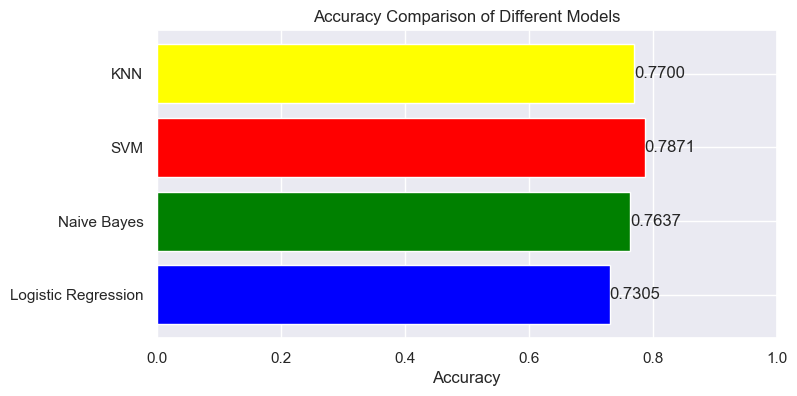

In [192]:
import matplotlib.pyplot as plt

# Example accuracies (replace these with your actual accuracy values)
accuracy_logistic = 0.7305
accuracy_naive_bayes = 0.7637
accuracy_svm = 0.7871
accuracy_knn = 0.77

# List of accuracy values
accuracies = [accuracy_logistic, accuracy_naive_bayes, accuracy_svm, accuracy_knn]

# Model names for labeling the histogram bars
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN']

# Plotting the horizontal bar plot with a smaller size
plt.figure(figsize=(8, 4))
bars = plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'yellow'])

# Add numerical values on top of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{accuracy:.4f}', ha='left', va='center')

plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy percentage (0-100%)
plt.show()


In [193]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic
